Projet 6: Prédiction du Prix de l'Immobilier
Contexte
La prédiction des prix de l'immobilier est essentielle pour les agents immobiliers et les acheteurs potentiels afin de prendre des décisions informées.

Problème
Vous devez développer un modèle pour prédire les prix de l'immobilier et déployer une application qui permet aux utilisateurs de soumettre des caractéristiques de propriétés pour obtenir une estimation du prix.

Dataset
Lien: house prices data

Instructions
Importer et explorer le dataset.
Prétraiter les données (gestion des valeurs manquantes, encodage des variables catégorielles).
Entraîner un modèle de prédiction des prix (par exemple, une régression linéaire, XGBoost).
Évaluer la performance du modèle.
Créer une application web pour permettre la prédiction des prix de l'immobilier.
Déployer l'application

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

Nous allons charger le jeu de données (train), dans un dataframe que nous nommerons ici `data`.
Le jeu de données (test) dans un dataframe 'datatest'.
Le jeu de données (sample_submission) dans un dataframe 'datasample'
Nous afficherons ensuite les 5 premières valeurs de data.

In [10]:
data = pd.read_csv('train.csv')
datatest = pd.read_csv('test.csv')
datasample = pd.read_csv('sample_submission.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Nous allons à présent fussionner la deuxième colonne de 'sample_submission.csv' qui comporte les prix de vente avec le fichier 'test.csv'
L'objectif est de rassembler toutes les données des fichiers en un seul jeu de données pour le prétraitement.

In [11]:
col_B = datasample.iloc[:, 1]                      # Extraction de la deuxième colonne de datasample
datatest["SalePrice"] = col_B.values               # Création dans datatest de la colonne des prix 
datatest = datatest.iloc[1:].reset_index(drop=True) # Supression de la ligne des noms de colonnes dans datatest
print(data.columns.equals(datatest.columns))        # Verifier si datatest et data ont la même taille

True


In [12]:
# Fusion des deux jeux de donnés et création d'un fichier csv bilan

datafus = pd.concat([data, datatest], axis=0, ignore_index=True)
for col in datafus.columns:
    datafus[col] = pd.to_numeric(datafus[col], errors="ignore")
datafus.dtypes
datafus.to_csv("fichierfus.csv", index=False)

# <a name="C2">A- Nettoyage du jeu de données</a>

Plusieurs **erreurs** se sont glissées dans ce jeu de données. Nous allons donc passer au nettoyage

In [13]:
# Types de données
datafus.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

In [14]:
datafus.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [15]:
datafus.shape

(2918, 81)

In [16]:
datafus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2918 non-null   int64  
 1   MSSubClass     2918 non-null   int64  
 2   MSZoning       2914 non-null   object 
 3   LotFrontage    2432 non-null   float64
 4   LotArea        2918 non-null   int64  
 5   Street         2918 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2918 non-null   object 
 8   LandContour    2918 non-null   object 
 9   Utilities      2916 non-null   object 
 10  LotConfig      2918 non-null   object 
 11  LandSlope      2918 non-null   object 
 12  Neighborhood   2918 non-null   object 
 13  Condition1     2918 non-null   object 
 14  Condition2     2918 non-null   object 
 15  BldgType       2918 non-null   object 
 16  HouseStyle     2918 non-null   object 
 17  OverallQual    2918 non-null   int64  
 18  OverallC


### Traitement des valeurs manquantes

In [17]:
# Supression des lignes doubles
data = data.drop_duplicates()
datatest = datatest.drop_duplicates()
# Point des cellules avec valeurs non existantes
missing = datafus.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

PoolQC          2908
MiscFeature     2813
Alley           2720
Fence           2348
MasVnrType      1765
FireplaceQu     1419
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
BsmtFinSF1         1
GarageCars         1
GarageArea         1
Exterior2nd        1
BsmtUnfSF          1
Exterior1st        1
SaleType           1
TotalBsmtSF        1
BsmtFinSF2         1
KitchenQual        1
Electrical         1
dtype: int64

In [ ]:
Toutes les valeurs nulles ne signifient pas forcement Valeurs Manquantes.
CAS 1 : Absence normal des équipements.
Les valeurs manquantes correspondent à  l’absence de l’équipement concerné 
(garage, piscine, sous-sol, etc.). Elles ont donc été remplacées pour conserver
la structure par la modalité None.

In [18]:
none_cols = [
    "PoolQC","MiscFeature","Alley","Fence","FireplaceQu","MasVnrType",
    "GarageType","GarageFinish","GarageQual","GarageCond",
    "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"
]

datafus[none_cols] = datafus[none_cols].fillna("None")


In [ ]:
Cas 2 : Variables numériques liées à un équipement
Dans ce cas, si la valeur est absente , cela signifie que la valeur est nulle
Par exemple, une surface inexistante donnera 0

In [19]:
numtest_median_cols = [
    "LotFrontage", "MasVnrArea", "GarageYrBlt",
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
    "TotalBsmtSF", "GarageArea", "GarageCars",
    "BsmtFullBath", "BsmtHalfBath"
]

for col in numtest_median_cols:
    datafus[col] = datafus[col].fillna(datatest[col].median())

On observe que notre jeu de données contient 3 valeurs manquantes. Regardons les plus en détails :

In [ ]:
Cas 3 : Très peu de valeurs manquantes
On remplace ces valeurs par le mode de la série

In [20]:
# 2. Colonnes catégorielles → valeur la plus fréquente (mode)
cattest_mode_cols = [
    "MSZoning", "Utilities", "Exterior1st",
    "Exterior2nd", "KitchenQual",
    "Functional", "SaleType"
]

for col in cattest_mode_cols:
   datafus[col] = datafus[col].fillna(datafus[col].mode()[0])

In [21]:
# Cas particulier : MasVnrType
# NA signifie "pas de parement"
datafus["MasVnrType"] = datafus["MasVnrType"].fillna("None")

datafus["Electrical"] =datafus["Electrical"].fillna(
    datafus["Electrical"].mode()[0]
)

# Vérification finale
missing = datafus.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: int64)

In [ ]:
### Analyse Corrélation

In [22]:

# Analyse de corrélation avec le prix 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [23]:
# Colonnes numériques
numeric_cols = datafus.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Colonnes catégorielles
categorical_cols = datafus.select_dtypes(include=['object']).columns.tolist()

# Corrélation numérique avec le prix
corr_price = datafus[numeric_cols].corr()["SalePrice"].sort_values(ascending=False)
print("Top variables numériques corrélées avec le prix :")
print(corr_price)

Top variables numériques corrélées avec le prix :
SalePrice        1.000000
GrLivArea        0.588081
OverallQual      0.550921
TotRmsAbvGrd     0.469812
GarageCars       0.469255
GarageArea       0.465002
1stFlrSF         0.462860
TotalBsmtSF      0.453220
FullBath         0.433725
YearBuilt        0.362054
Fireplaces       0.353561
MasVnrArea       0.351868
YearRemodAdd     0.350037
GarageYrBlt      0.313538
LotFrontage      0.300977
LotArea          0.296512
BsmtFinSF1       0.272226
2ndFlrSF         0.272120
WoodDeckSF       0.238411
OpenPorchSF      0.236352
BedroomAbvGr     0.229588
HalfBath         0.228812
BsmtUnfSF        0.175191
BsmtFullBath     0.147670
ScreenPorch      0.082476
PoolArea         0.081036
MoSold           0.067217
3SsnPorch        0.029973
MiscVal         -0.000042
BsmtFinSF2      -0.007362
Id              -0.011630
BsmtHalfBath    -0.012750
LowQualFinSF    -0.015402
YrSold          -0.038975
OverallCond     -0.065762
EnclosedPorch   -0.070723
KitchenAbvGr  

In [ ]:
Corrélation forte / moyenne positive :
GrLivArea (surface habitable) : 0.588
OverallQual (qualité générale) : 0.551
TotRmsAbvGrd (nombre de pièces) : 0.470
GarageCars et GarageArea : ~0.465
1stFlrSF et TotalBsmtSF : 0.46 / 0.45
FullBath : 0.43

Corrélation faible :

2ndFlrSF, WoodDeckSF, OpenPorchSF : ~0.23–0.27

BedroomAbvGr, HalfBath : ~0.22

Corrélation négative ou très faible :

MiscVal, BsmtFinSF2, Id, YrSold, OverallCond : ~0 ou légèrement négatif

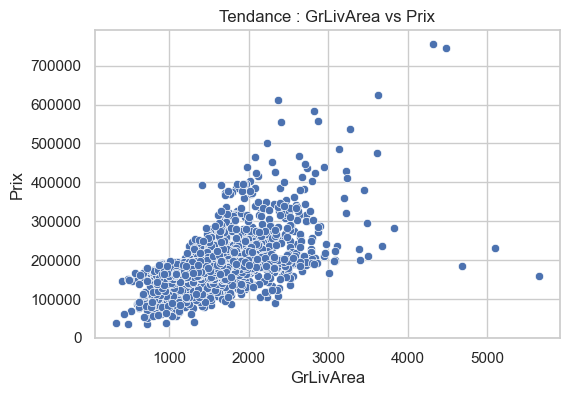

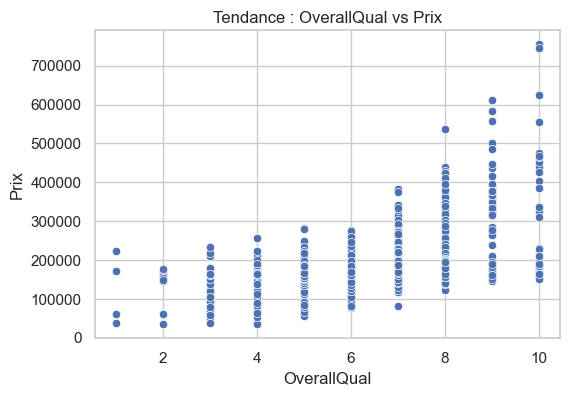

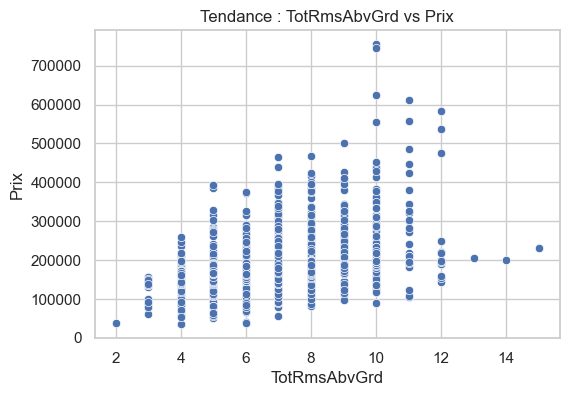

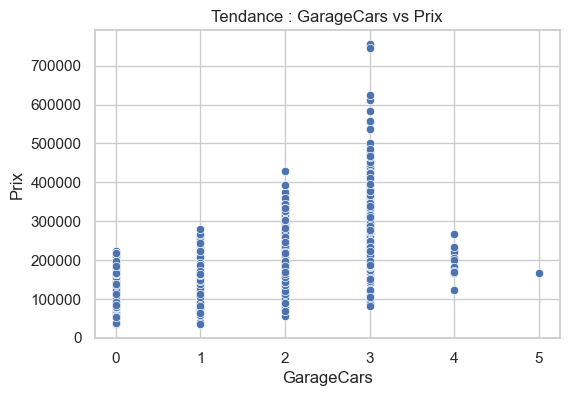

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des variables numériques fortement corrélées avec le prix
top_numeric_vars = [
    "GrLivArea", "OverallQual", "TotRmsAbvGrd", "GarageCars",
]

# Scatterplots
for var in top_numeric_vars:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=var, y="SalePrice", data=datafus)
    plt.title(f"Tendance : {var} vs Prix")
    plt.xlabel(var)
    plt.ylabel("Prix")
    plt.show()

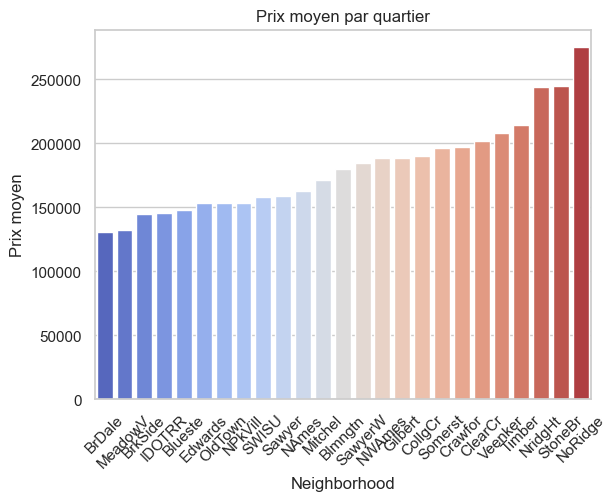

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_price = datafus.groupby("Neighborhood")["SalePrice"].mean().sort_values()
sns.barplot(x=avg_price.index, y=avg_price.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Prix moyen par quartier")
plt.ylabel("Prix moyen")
plt.show()


In [ ]:
### ENcodage et Pré-traitement

In [ ]:
Encodage des variables catégorielles One-Hot Encoding

In [27]:
X_train = datafus.drop("SalePrice", axis=1)
y_train = datafus["SalePrice"]
X_encoded = pd.get_dummies(X_train, drop_first=True)

In [ ]:
On standardise les données déjà encodées (one-hot) pour que le modèle travaille sur des variables à la même échelle.

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [ ]:
# <a name="C2">Entraînement des modèles de prédiction du prix</a>
Construire et entraîner des modèles capables de prédire le prix de vente (SalePrice) à partir des caractéristiques des logements.
Séparation jeu d’entraînement / test

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_train, test_size=0.2, random_state=42
)

In [ ]:
MODÈLE 1 – Régression linéaire
On va tester si la distribution des prix suit une tendance linéaire
MODÈLE 2 – XGBoost Regressor
Il Capture les relations non linéaires, Très performant sur les données tabulaires
et Gère bien les interactions complexes

In [30]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [31]:
y_pred_lr = lr_model.predict(X_test)

In [32]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# <a name="C2">Evaluation des performances</a>

Le prix étant une variable continue les erreurs absolues sont plus parlantes.
On determinera aussi R²

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_xgb = xgb_model.predict(X_test)

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    print(f"MAE  : {mae}")
    print(f"RMSE : {rmse}")
    print(f"R²   : {r2}")
    return mae, rmse, r2
print(f"Error calclulation linear method : ")
mae_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
print(f"Error calclulation xgb method : ")
mae_xgb, rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)


Error calclulation linear method : 
MAE  : 134153739302126.9
RMSE : 1938831792334511.5
R²   : -1.030717499095306e+21
Error calclulation xgb method : 
MAE  : 9869.826525043165
RMSE : 18826.057241081326
R²   : 0.9028197226942521


In [ ]:
Pour la méthode linéaire, les valeurs sont trop grandes. R² négatif signifie que le modèle n'est pas du tout performant.

XGB
MAE (Mean Absolute Error) ≈ 9 870 $
En moyenne, le modèle se trompe d’environ 9 870 $ sur le prix d’une maison.
RMSE (Root Mean Squared Error) ≈ 18 826 $
Cette métrique pénalise plus les grosses erreurs. Les écarts importants entre
la prédiction et la réalité peuvent aller jusqu’à ~19 000 $.
R² ≈ 0,903
Le modèle explique environ 90 % de la variance des prix. C’est un très bon score.

In [ ]:
# <a name="C2">Conclusion</a>

Deux modèles ont été entraînés et comparés : une régression linéaire servant de modèle de référence,
et un modèle XGBoost permettant de mieux capturer les relations complexes. 
L’évaluation des performances montre que XGBoost offre une meilleure précision de prédiction.

In [ ]:
# <a name="C2">Verification</a>
A présent, les utilisateurs auront à rentrer des paramètres de la maison recherchée.
Nous allons créer ici une fonction qui se chargera de formater les données rentrées pour utiliser notre modèle.

In [34]:
valeurmaison = {
    "Id": 2, "MSSubClass": 20, "MSZoning": "RL", "LotFrontage": 80, "LotArea": 9600,
    "Street": "Pave", "Alley": "NA", "LotShape": "Reg", "LandContour": "Lvl",
    "Utilities": "AllPub", "LotConfig": "FR2", "LandSlope": "Gtl", "Neighborhood": "Veenker",
    "Condition1": "Feedr", "Condition2": "Norm", "BldgType": "1Fam", "HouseStyle": "1Story",
    "OverallQual": 6, "OverallCond": 8, "YearBuilt": 1976, "YearRemodAdd": 1976,
    "RoofStyle": "Gable", "RoofMatl": "CompShg", "Exterior1st": "MetalSd", "Exterior2nd": "MetalSd",
    "MasVnrType": "None", "MasVnrArea": 0, "ExterQual": "TA", "ExterCond": "TA",
    "Foundation": "CBlock", "BsmtQual": "Gd", "BsmtCond": "TA", "BsmtExposure": "Gd",
    "BsmtFinType1": "ALQ", "BsmtFinSF1": 978, "BsmtFinType2": "Unf", "BsmtFinSF2": 0,
    "BsmtUnfSF": 284, "TotalBsmtSF": 1262, "Heating": "GasA", "HeatingQC": "Ex",
    "CentralAir": "Y", "Electrical": "SBrkr", "1stFlrSF": 1262, "2ndFlrSF": 0,
    "LowQualFinSF": 0, "GrLivArea": 1262, "BsmtFullBath": 0, "BsmtHalfBath": 1,
    "FullBath": 2, "HalfBath": 0, "BedroomAbvGr": 3, "KitchenAbvGr": 1, "KitchenQual": "TA",
    "TotRmsAbvGrd": 6, "Functional": "Typ", "Fireplaces": 1, "FireplaceQu": "TA",
    "GarageType": "Attchd", "GarageYrBlt": 1976, "GarageFinish": "RFn", "GarageCars": 2,
    "GarageArea": 460, "GarageQual": "TA", "GarageCond": "TA", "PavedDrive": "Y",
    "WoodDeckSF": 298, "OpenPorchSF": 0, "EnclosedPorch": 0, "3SsnPorch": 0,
    "ScreenPorch": 0, "PoolArea": 0, "PoolQC": "NA", "Fence": "NA", "MiscFeature": "NA",
    "MiscVal": 0, "MoSold": 5, "YrSold": 2007, "SaleType": "WD", "SaleCondition": "Normal"
}


In [35]:
# transformer en DataFrame
nouvelle_maison_df = pd.DataFrame([valeurmaison])

# encodage identique à X_train
nouvelle_maison_encoded = pd.get_dummies(nouvelle_maison_df)
nouvelle_maison_encoded = nouvelle_maison_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# standardisation
nouvelle_maison_scaled = scaler.transform(nouvelle_maison_encoded)

# prédiction
prix_pred = xgb_model.predict(nouvelle_maison_scaled)
print(f"Prix estimé : {prix_pred[0]:,.2f} $")


Prix estimé : 181,351.47 $


In [ ]:
# <a name="C2">CREATION APPLICATION</a>
Créer une application web pour permettre la prédiction des prix de l'immobilier.

On va créer une application web interactive pour la prédiction immobilière. 
On va le faire avec Streamlit, qui est simple pour déployer un formulaire et afficher la prédiction.

prediction_immobilier/
│
├─ app.py
├─ xgb_model.pkl
├─ scaler.pkl
├─ X_encoded_columns.pkl

In [ ]:
Ce code sauvegarde le modèle XGBoost entraîné, le StandardScaler utilisé pour normaliser les données après le One-Hot Encoding, ainsi que la liste exacte des colonnes générées par cet encodage. 
Ces trois éléments sont indispensables pour garantir que les nouvelles données saisies dans l’application web subissent exactement les mêmes transformations que les données d’entraînement,
permettant ainsi d’obtenir des prédictions cohérentes et fiables sans réentraîner le modèle.

In [36]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
joblib.dump(xgb_model, "xgb_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X_encoded.columns, "X_encoded_columns.pkl")


['X_encoded_columns.pkl']

In [ ]:
Creation de l'application principale

In [ ]:
import streamlit as st
import pandas as pd
import joblib

# -------------------
# Charger le modèle et le scaler
# -------------------
xgb_model = joblib.load("xgb_model.pkl")
scaler = joblib.load("scaler.pkl")
X_encoded = joblib.load("X_encoded_columns.pkl")  # colonnes après one-hot encoding

# -------------------
# Labels français + descriptions
# -------------------
labels_fr = {
    "MSSubClass": ("Type construction", "Classe de construction de la maison"),
    "MSZoning": ("Zone du terrain", "Type de zonage : résidentiel, commercial, etc."),
    "LotFrontage": ("Façade sur rue", "Longueur du terrain le long de la rue en pieds"),
    "LotArea": ("Superficie du terrain", "Surface totale du terrain en pieds²"),
    "Street": ("Type de rue", "Pavé ou non"),
    "Alley": ("Allée", "Type d'accès secondaire ou NA"),
    "LotShape": ("Forme du terrain", "Régulier ou irrégulier"),
    "LandContour": ("Contour du terrain", "Plat ou pente"),
    "Utilities": ("Services publics", "AllPub=Tout disponible, NoSewr=Non"),
    "LotConfig": ("Configuration du lot", "FR2, Inside, Corner, CulDSac"),
    "LandSlope": ("Pente du terrain", "Gtl=Faible, Mod=Moyenne, Sev=Forte"),
    "Neighborhood": ("Quartier", "Nom du quartier"),
    "Condition1": ("Proximité route 1", "Route principale proche de la maison"),
    "Condition2": ("Proximité route 2", "Deuxième route proche de la maison"),
    "BldgType": ("Type de bâtiment", "1Fam=Maison individuelle, 2FmCon=Duplex..."),
    "HouseStyle": ("Style de maison", "1Story, 2Story, etc."),
    "OverallQual": ("Qualité générale", "1=Mauvais, 10=Excellent"),
    "OverallCond": ("État général", "1 à 10"),
    "YearBuilt": ("Année construction", "Année de construction"),
    "YearRemodAdd": ("Année rénovation", "Année de remodelage"),
    "RoofStyle": ("Style toit", "Gable, Hip, Flat..."),
    "RoofMatl": ("Matériau toit", "CompShg, Metal, etc."),
    "Exterior1st": ("Revêtement extérieur 1", "VinylSd, MetalSd, etc."),
    "Exterior2nd": ("Revêtement extérieur 2", "VinylSd, MetalSd, etc."),
    "MasVnrType": ("Type maçonnerie", "None, BrkFace, Stone, etc."),
    "MasVnrArea": ("Surface maçonnerie", "En pieds²"),
    "ExterQual": ("Qualité extérieur", "Ex=Excellent, Gd=Bon, TA=Correct, Fa=Médiocre, Po=Mauvais"),
    "ExterCond": ("État extérieur", "Ex, Gd, TA, Fa, Po"),
    "Foundation": ("Fondation", "PConc, CBlock, BrkTil, Slab, etc."),
    "BsmtQual": ("Qualité sous-sol", "Ex, Gd, TA, Fa, Po, NA"),
    "BsmtCond": ("État sous-sol", "Ex, Gd, TA, Fa, Po, NA"),
    "BsmtExposure": ("Exposition sous-sol", "Gd=Bonne, Av=Moyenne, Mn=Faible, No=Aucune, NA"),
    "BsmtFinType1": ("Type finition 1", "GLQ, ALQ, BLQ, Rec, LwQ, Unf, NA"),
    "BsmtFinSF1": ("Surface finie 1", "En pieds²"),
    "BsmtFinType2": ("Type finition 2", "GLQ, ALQ, BLQ, Rec, LwQ, Unf, NA"),
    "BsmtFinSF2": ("Surface finie 2", "En pieds²"),
    "BsmtUnfSF": ("Sous-sol non fini", "En pieds²"),
    "TotalBsmtSF": ("Surface totale sous-sol", "En pieds²"),
    "1stFlrSF": ("Surface 1er étage", "En pieds²"),
    "2ndFlrSF": ("Surface 2ème étage", "En pieds²"),
    "GrLivArea": ("Surface habitable", "En pieds²"),
    "GarageCars": ("Capacité garage", "Nombre de voitures"),
    "GarageArea": ("Surface garage", "En pieds²"),
    "WoodDeckSF": ("Terrasse bois", "Surface en pieds²"),
    "OpenPorchSF": ("Porche ouvert", "Surface en pieds²"),
    "EnclosedPorch": ("Porche fermé", "Surface en pieds²"),
    "ScreenPorch": ("Porche grillagé", "Surface en pieds²"),
    "PoolArea": ("Piscine", "Surface en pieds²"),
    "MiscVal": ("Valeur divers", "Valeur des commodités diverses"),
    "MoSold": ("Mois de vente", "1=Janvier, 12=Décembre"),
    "YrSold": ("Année de vente", "Ex: 2010, 2015, etc."),
    "Heating": ("Type chauffage", "GasA, GasW, Floor, etc."),
    "HeatingQC": ("Qualité chauffage", "Ex, Gd, TA, Fa, Po"),
    "CentralAir": ("Climatisation centrale", "Y=Oui, N=Non"),
    "Electrical": ("Électricité", "SBrkr, FuseF, FuseA, Mix"),
    "KitchenQual": ("Qualité cuisine", "Ex, Gd, TA, Fa, Po"),
    "Functional": ("Fonctionnalité maison", "Typ=Normal, Min1=Minimale, etc."),
    "FireplaceQu": ("Qualité cheminée", "Ex, Gd, TA, Fa, Po, NA"),
    "GarageType": ("Type garage", "Attchd, Detchd, BuiltIn, CarPort, NA"),
    "GarageFinish": ("Finition garage", "Fin, RFn, Unf, NA"),
    "GarageQual": ("Qualité garage", "Ex, Gd, TA, Fa, Po, NA"),
    "GarageCond": ("État garage", "Ex, Gd, TA, Fa, Po, NA"),
    "PavedDrive": ("Allée pavée", "Y=Oui, P=Partiel, N=Non"),
    "PoolQC": ("Qualité piscine", "Ex, Gd, TA, Fa, Po, NA"),
    "Fence": ("Clôture", "GdPrv, MnPrv, GdWo, MnWw, NA"),
    "MiscFeature": ("Caractéristiques diverses", "Elev, Gar2, Shed, TenC, NA"),
    "SaleType": ("Type de vente", "WD, CWD, VWD, ConLD, ConLI, ConLw, Oth"),
    "SaleCondition": ("Condition vente", "Normal, Abnorml, AdjLand, Alloca, Family, Partial")
}

# -------------------
# Options pour les selectbox
# -------------------
options_dict = {
    "LandContour": {"Lvl":"Plat","Bnk":"Pente","HLS":"Haut-Bas","Low":"Bas"},
    "LotShape": {"Reg":"Régulier","IR1":"Irrégulier 1","IR2":"Irrégulier 2","IR3":"Irrégulier 3"},
    "ExterQual": {"Ex":"Excellent","Gd":"Bon","TA":"Correct","Fa":"Médiocre","Po":"Mauvais"},
    "ExterCond": {"Ex":"Excellent","Gd":"Bon","TA":"Correct","Fa":"Médiocre","Po":"Mauvais"},
    "BsmtQual": {"Ex":"Excellent","Gd":"Bon","TA":"Correct","Fa":"Médiocre","Po":"Mauvais","NA":"Aucun"},
    "BsmtCond": {"Ex":"Excellent","Gd":"Bon","TA":"Correct","Fa":"Médiocre","Po":"Mauvais","NA":"Aucun"},
    "BsmtExposure": {"Gd":"Bonne","Av":"Moyenne","Mn":"Faible","No":"Aucune","NA":"Aucune"},
    "BsmtFinType1": {"GLQ":"Good Living","ALQ":"Average Living","BLQ":"Basement Living","Rec":"Recréation","LwQ":"Low Quality","Unf":"Non fini","NA":"Aucun"},
    "BsmtFinType2": {"GLQ":"Good Living","ALQ":"Average Living","BLQ":"Basement Living","Rec":"Recréation","LwQ":"Low Quality","Unf":"Non fini","NA":"Aucun"},
    "GarageType": {"Attchd":"Attaché","Detchd":"Détaché","BuiltIn":"Intégré","CarPort":"Abri","NA":"Aucun"},
    "GarageFinish": {"Fin":"Fini","RFn":"Semi-fini","Unf":"Non fini","NA":"Aucun"},
    "GarageQual": {"Ex":"Excellent","Gd":"Bon","TA":"Correct","Fa":"Médiocre","Po":"Mauvais","NA":"Aucun"},
    "GarageCond": {"Ex":"Excellent","Gd":"Bon","TA":"Correct","Fa":"Médiocre","Po":"Mauvais","NA":"Aucun"},
    "PavedDrive": {"Y":"Oui","P":"Partiel","N":"Non"},
    "CentralAir": {"Y":"Oui","N":"Non"},
    "FireplaceQu": {"Ex":"Excellent","Gd":"Bon","TA":"Correct","Fa":"Médiocre","Po":"Mauvais","NA":"Aucun"}
}

# -------------------
# Valeurs par défaut
# -------------------
default_values = {field: 0 for field in labels_fr.keys()}
default_values.update({
    "MSSubClass":20, "LotFrontage":80, "LotArea":9600, "OverallQual":7, "OverallCond":5,
    "YearBuilt":2000, "YearRemodAdd":2005, "MasVnrArea":0, "BsmtFinSF1":0, "BsmtFinSF2":0,
    "BsmtUnfSF":0, "TotalBsmtSF":0, "1stFlrSF":900, "2ndFlrSF":500, "GrLivArea":1400,
    "GarageCars":2, "GarageArea":400, "WoodDeckSF":0, "OpenPorchSF":0, "EnclosedPorch":0,
    "ScreenPorch":0, "PoolArea":0, "MiscVal":0, "MoSold":6, "YrSold":2020,
    "MSZoning":"RL", "Street":"Pave", "Alley":"NA", "LotShape":"Reg", "LandContour":"Lvl",
    "Utilities":"AllPub", "LotConfig":"FR2", "LandSlope":"Gtl", "Neighborhood":"CollgCr",
    "Condition1":"Norm", "Condition2":"Norm", "BldgType":"1Fam", "HouseStyle":"2Story",
    "RoofStyle":"Gable", "RoofMatl":"CompShg", "Exterior1st":"VinylSd", "Exterior2nd":"VinylSd",
    "MasVnrType":"None", "ExterQual":"Gd", "ExterCond":"TA", "Foundation":"PConc",
    "BsmtQual":"Gd", "BsmtCond":"TA", "BsmtExposure":"No", "BsmtFinType1":"GLQ", "BsmtFinType2":"Unf",
    "Heating":"GasA", "HeatingQC":"Ex", "CentralAir":"Y", "Electrical":"SBrkr", "KitchenQual":"Gd",
    "Functional":"Typ", "FireplaceQu":"NA", "GarageType":"Attchd", "GarageFinish":"Unf",
    "GarageQual":"TA", "GarageCond":"TA", "PavedDrive":"Y", "PoolQC":"NA", "Fence":"NA",
    "MiscFeature":"NA", "SaleType":"WD", "SaleCondition":"Normal"
})

# -------------------
# Formulaire Streamlit final
# -------------------
st.set_page_config(page_title="Prédiction Prix Immobilier", layout="wide")
st.title("🏠 Prédiction du Prix de l'Immobilier")
st.markdown("Remplissez les informations sur la maison. Les valeurs par défaut sont pré-remplies.")

with st.form(key='maison_form'):
    valeurs = {}
    cols = st.columns(3)
    for i, field in enumerate(labels_fr.keys()):
        col = cols[i % 3]
        label, desc = labels_fr[field]
        default = default_values[field]
        st.markdown(f"**{label}**")  # Label en haut
        col.caption(desc)            # Description en bas

        # Champ catégoriel ou numérique
        if field in options_dict or isinstance(default, str):
            valeurs[field] = col.selectbox(
                label="",
                options=list(options_dict.get(field, {default: default}).keys()),
                format_func=lambda x, f=field: options_dict.get(f, {default: default})[x] if f in options_dict else x,
                index=list(options_dict.get(field, {default: default}).keys()).index(default),
                key=f"{field}_select"  # clé unique
            )
        else:
            valeurs[field] = col.number_input(
                label="",
                value=float(default),
                min_value=0.0,
                key=f"{field}_num"  # clé unique
            )

    submit_button = st.form_submit_button(label="💰 Prédire le prix")

# -------------------
# Prédiction
# -------------------
if submit_button:
    nouvelle_maison_df = pd.DataFrame([valeurs])
    nouvelle_maison_encoded = pd.get_dummies(nouvelle_maison_df)
    nouvelle_maison_encoded = nouvelle_maison_encoded.reindex(columns=X_encoded, fill_value=0)
    nouvelle_maison_scaled = scaler.transform(nouvelle_maison_encoded)
    prix_pred = xgb_model.predict(nouvelle_maison_scaled)
    st.markdown("---")
    st.subheader("💡 Résultat")
    st.success(f"Le prix estimé de cette maison est : **{prix_pred[0]:,.2f} $**")
    st.balloons()


In [ ]:
# <a name="C2">TESTER L"APPLICATION</a>

In [ ]:
pip install streamlit pandas scikit-learn xgboost
 # Dans le terminal,se placer dans le dossier prediction_immobilier et lancer
streamlit run app.py

In [ ]:
# <a name="C2">DEPLOIEMENT L"APPLICATION</a>

In [ ]:
REALISE AVEC Steamlit